In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import re
import matplotlib.pyplot as plt
import pandas as pd

embedder = SentenceTransformer('distilroberta-base-paraphrase-v1')

Testing Sentence Database:

In [2]:
# Objective 1: File Path and Reading
df = pd.read_csv("Foia.csv")
df = df.fillna(method="ffill")

In [3]:
def str_to_split(x):
    return re.sub(r'\W+', ' ', x).split()

In [4]:
sentence = []
for index, row in df.iterrows():
    sentence.append(row['Description'])

In [5]:
sentence

['All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.',
 'Information relating to an operation at the end of the Gulf War in April of 1991\ndubbed "Operation Manly Rip".',
 'A clearly releasable copy of Sections A through J of the awarded contract, including the statement of work, for the contract awarded from solicitation number HROO11O6ROO2.',
 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number EFTHQ00038615002.',
 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number BAA0539.',
 'A clearly releasable copy of Section A (the cover page) of any contract awarded to\ndate off of solicitation number BAAO6O6.',
 'All documents from March 1 through December 31, 2003 concerned with\ndiscussions with the United Kingdom regarding 1) the establishment of the Coalition Provisional Authority in Iraq; and 2) the legal status of the CPA.

In [6]:
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]

In [7]:
corpus_embeddings = embedder.encode(sentence)

In [8]:
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

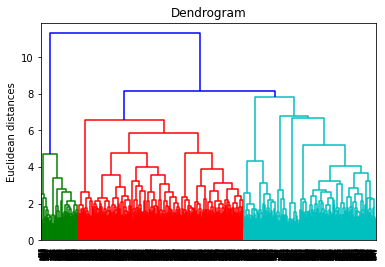

In [9]:
Z = hierarchy.linkage(corpus_embeddings, "ward")
dn = hierarchy.dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
#plt.xlim(0,100)
#plt.ylim(0,0.05)
plt.show()

In [15]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=4) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(sentence[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.', 'Information relating to an operation at the end of the Gulf War in April of 1991\ndubbed "Operation Manly Rip".', 'Back ground information relating to PSYOPS and there place in modern warfare.', 'Referral from DOS for review concerning the Iraq Foundation from January 2002 to\nthe present.', 'Records concerning the North American Forum at the Banff Springs Hotel in Banif, Alberta, Canada on September 12 — 14, 2006.', 'Requests the release of document AD 0356914 entitled "Studies in Advanced Penetration Problems", (dated January 24, 1965).', 'The participation of the listed DoD personnel at a North American Forum at the Banff Springs Hotel in Banff, Alberta, Canada on September 12 — 14, 2006.', 'Any reports, memos, cables, or briefing papers on a U.S. "false missile alert” that occurred overnight on 9 November 1979 and led to momentary concerns i

In [16]:
len(clustered_sentences)

15

In [25]:
clustered_sentences[2]

['General statistics showing the number of convictions of military women verses the number of convictions of military men on both serious offenses (murder, rape, drugs, etc.) and petty crimes (larceny, fraud, etc.) for the year 2005, and any\nfurther back that can be found.',
 'Request for videos related to social issues concerning domestic abuse, prevention of hazing, ect…',
 'Referral from the DOJ for document review concerning all reports of investigations conducted since January 1, 2001 regarding unauthorized disclosure of classified\ninformation to the press or public.',
 'All National Defense University (NDU) agency records to indicate the following post 2000 Employment Activities Regarding NDU hiring of Dr. Michael Gold-Biss as a full time faculty member or consultant and all records on COL Mayor Betty G. Flores.',
 "All inputs, from all sourcse, to the Pentagon's 4 September 2001 Review of the USFSPA be provided to the American Retirees Association (ARA).",
 "All documents gene

In [19]:
def freq(x):
    D = dict()
    for i in x:
        Str = i.split()
        for j in Str:
            if j in D:
                D[j] += 1
            else:
                D[j] = 1
    return sorted(D.items(), key=lambda x: x[1], reverse=True)
        

In [24]:
freq(clustered_sentences[2])

[('the', 564),
 ('of', 444),
 ('and', 291),
 ('to', 265),
 ('All', 132),
 ('Defense', 111),
 ('for', 108),
 ('from', 105),
 ('or', 104),
 ('in', 102),
 ('Department', 87),
 ('on', 85),
 ('all', 83),
 ('records', 76),
 ('1,', 73),
 ('by', 69),
 ('any', 63),
 ('between', 61),
 ('documents', 45),
 ('that', 40),
 ('concerning', 38),
 ('relating', 38),
 ('with', 38),
 ('January', 37),
 ('U.S.', 34),
 ('correspondence', 33),
 ('The', 33),
 ('Jan.', 33),
 ('2007', 33),
 ('Records', 32),
 ('members', 32),
 ('related', 31),
 ('information', 31),
 ('a', 31),
 ('regarding', 29),
 ('Board', 29),
 ('since', 28),
 ('United', 28),
 ('military', 27),
 ('2001.', 27),
 ('and/or', 27),
 ('Secretary', 26),
 ('—', 26),
 ('September', 25),
 ('pertaining', 25),
 ('during', 25),
 ('as', 24),
 ('Information', 24),
 ('States', 23),
 ('(matching', 23),
 ('2001', 22),
 ('following', 22),
 ('at', 22),
 ('material', 20),
 ('other', 20),
 ('which', 18),
 ('current', 18),
 ('Congress', 18),
 ('Documents', 17),
 ('For

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(clustered_sentences[2])

In [31]:
doc_term_matrix

<281x692 sparse matrix of type '<class 'numpy.int64'>'
	with 3715 stored elements in Compressed Sparse Row format>

In [32]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [33]:
for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])


way
contractors
jan
written
secretary
22
organizations
monitor
047
use


In [34]:
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

air
office
united
states
government
force
secretary
records
documents
defense


In [35]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['air', 'office', 'united', 'states', 'government', 'force', 'secretary', 'records', 'documents', 'defense']


Top 10 words for topic #1:
['reagan', 'related', 'thatcher', '2002', '11', 'material', 'present', 'matching', '2001', 'records']


Top 10 words for topic #2:
['request', 'january', 'documents', 'senator', 'present', 'concerning', 'information', 'records', 'defense', 'department']


Top 10 words for topic #3:
['information', 'current', 'science', 'letters', 'members', 'department', 'jan', 'board', '2001', 'defense']


Top 10 words for topic #4:
['members', '2006', '2005', 'records', 'january', 'congress', 'department', '2007', 'correspondence', 'defense']


